# **Laboratorio 01: Bank Marketing Data Set**

## Glosario de Variables

Variables
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:

8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

other attributes:

11. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
12. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
13. previous: number of contacts performed before this campaign and for this client (numeric)
14. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes:

15. emp.var.rate: employment variation rate - quarterly indicator (numeric)
16. cons.price.idx: consumer price index - monthly indicator (numeric)
17. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
18. euribor3m: euribor 3 month rate - daily indicator (numeric)
19. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

20. y - has the client subscribed a term deposit? (binary: 'yes','no')



## 1 - ETL

### Extracción

In [1]:
from google.colab import drive
import pandas as pd
import chardet

# Montamos Google Drive para acceder al archivo
drive.mount('/content/drive', force_remount=True)

ruta_archivo = '/content/drive/MyDrive/bank-direct-marketing-campaigns.csv'
with open(ruta_archivo, 'rb') as f:
  result = chardet.detect(f.read())

try:
  #data frame
  #el sep es para definir que cada dato está separado por ";". La convención es ","
  df = pd.read_csv(ruta_archivo, encoding=result['encoding'], sep=',',decimal='.')
  print('Extracción de datos exitosa')
except FileNotFoundError:
  print(f'El archvivo no se encuentra en {ruta_archivo}')

Mounted at /content/drive
Extracción de datos exitosa


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Transformación

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [5]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [11]:
#Creo la función clasificar_edad para crear una nueva columna grupo_edad a modo de clasificar a cada persona por su grupo etario.
def clasificar_edad(x):
    if x < 30:
        return 'Joven'
    elif x < 50:
        return 'Adulto'
    else:
        return 'Senior'

df['grupo_edad'] = df['age'].apply(clasificar_edad)

In [10]:
#Creo la función clasificar_contacto para crear una nueva columna contactos_recientes a modo de clasificar a cada persona por si ha sido contactada con anterioridad.
def clasificar_contacto(pdays, previous):
    if pdays == 999:
        return 'No contactado antes'
    elif previous > 2 and pdays < 30:
        return 'Alta frecuencia reciente'
    elif previous > 0:
        return 'Frecuencia moderada'
    else:
        return 'Contactado hace tiempo'

df['contactos_recientes'] = df.apply(lambda x: clasificar_contacto(x['pdays'], x['previous']), axis=1)

In [13]:
df['riesgo_crediticio'] = df.apply(lambda x: 'Alto' if x['default']=='yes' or x['loan']=='yes' else 'Bajo', axis=1)

In [14]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,grupo_edad,contactos_recientes,riesgo_crediticio
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Senior,No contactado antes,Bajo
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Senior,No contactado antes,Bajo
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Adulto,No contactado antes,Bajo
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Adulto,No contactado antes,Bajo
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Senior,No contactado antes,Alto


### Carga

In [15]:
# Definir la ruta de salida para guardar el nuevo csv
ruta_salida = '/content/drive/MyDrive/bank-direct-marketing-campaigns-transformado.csv'

# Guardar el df transformado en un nuevo archivo transformado en un nuevo csv guardado en drive
df.to_csv(ruta_salida, index=False, sep=',')

## 2 - EDA

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41188 non-null  int64  
 1   job                  41188 non-null  object 
 2   marital              41188 non-null  object 
 3   education            41188 non-null  object 
 4   default              41188 non-null  object 
 5   housing              41188 non-null  object 
 6   loan                 41188 non-null  object 
 7   contact              41188 non-null  object 
 8   month                41188 non-null  object 
 9   day_of_week          41188 non-null  object 
 10  campaign             41188 non-null  int64  
 11  pdays                41188 non-null  int64  
 12  previous             41188 non-null  int64  
 13  poutcome             41188 non-null  object 
 14  emp.var.rate         41188 non-null  float64
 15  cons.price.idx       41188 non-null 

In [16]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


El dataset contiene 41.188 registros y 23 columnas.
La mayoría de las variables son categóricas (por ejemplo, job, marital, education, housing), mientras que otras son numéricas (age, campaign, previous).
No se observan valores nulos, aunque algunas variables como pdays tienen un valor especial (999) que representa “no contactado anteriormente”.
Los tipos de datos son correctos y no hay registros duplicados.
Esto indica que el dataset está en buenas condiciones para iniciar el análisis exploratorio.

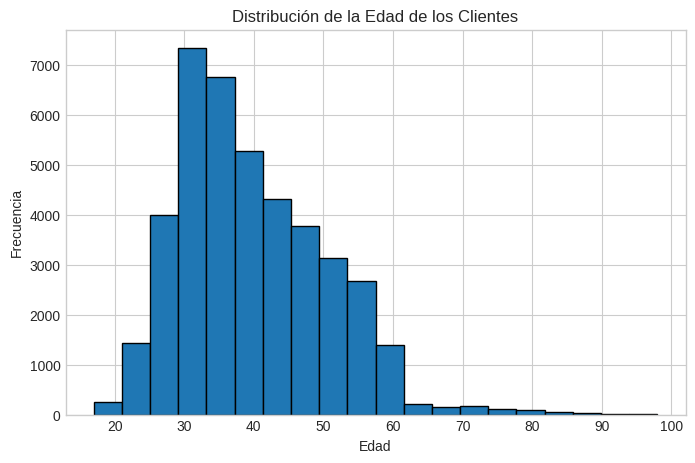

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8,5))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Distribución de la Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

/tmp/ipython-input-1037518480.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='y', palette='pastel')


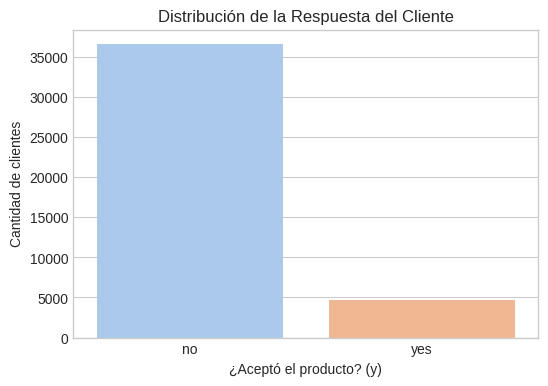

In [22]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='y', palette='pastel')
plt.title('Distribución de la Respuesta del Cliente')
plt.xlabel('¿Aceptó el producto? (y)')
plt.ylabel('Cantidad de clientes')
plt.show()

/tmp/ipython-input-2276840100.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y='age', palette='Set2')


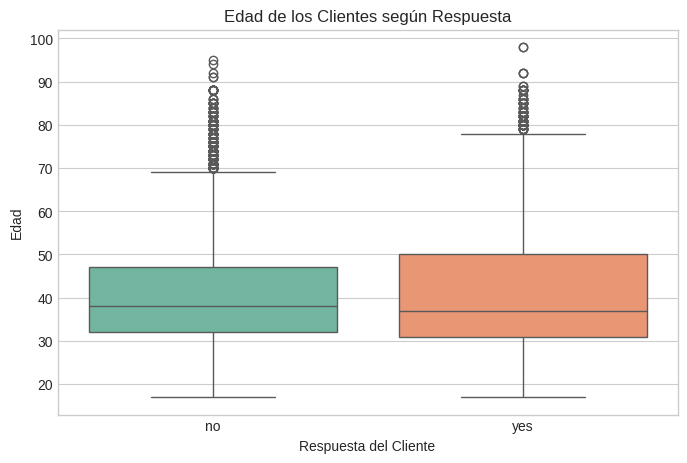

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='y', y='age', palette='Set2')
plt.title('Edad de los Clientes según Respuesta')
plt.xlabel('Respuesta del Cliente')
plt.ylabel('Edad')
plt.show()

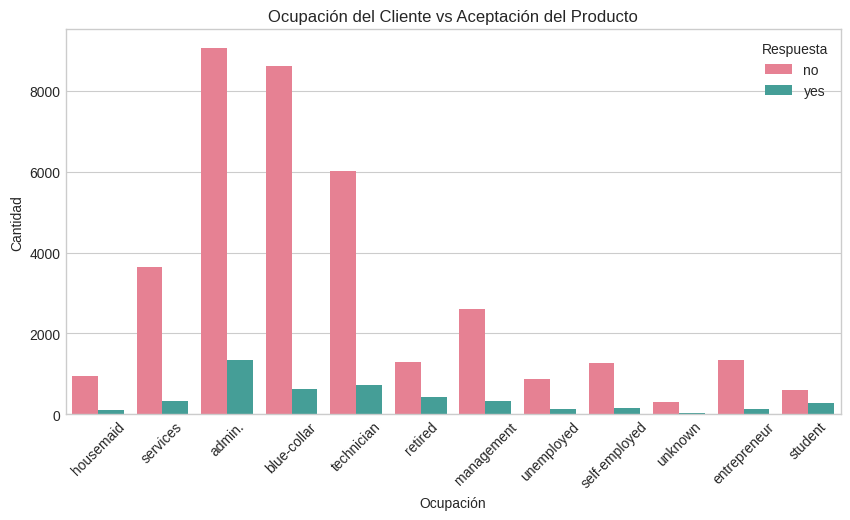

In [28]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='job', hue='y', palette='husl')
plt.title('Ocupación del Cliente vs Aceptación del Producto')
plt.xticks(rotation=45)
plt.xlabel('Ocupación')
plt.ylabel('Cantidad')
plt.legend(title='Respuesta')
plt.show()

1. Distribución de la edad:
El histograma muestra que la mayoría de los clientes tienen entre 30 y 50 años, lo que sugiere que la campaña se enfocó principalmente en adultos en edad laboral activa. Hay pocos clientes jóvenes (<25) o mayores (>60).

2. Distribución de la respuesta:
La variable objetivo "y" está desbalanceada: la mayoría de los clientes no aceptaron el producto (respuesta "no"). Esto indica que las campañas tienen una tasa de conversión baja, lo cual es habitual en marketing telefónico.

3. Edad y aceptación:
El diagrama de cajas sugiere que los clientes que aceptaron la oferta tienden a tener ligeramente mayor edad promedio que los que no lo hicieron. Esto podría reflejar mayor interés por productos de ahorro en personas más maduras.

4. Ocupación y respuesta:
Se observa que los grupos con mayor tasa de aceptación pertenecen a categorías como "admin" y “technician”, mientras que los trabajadores de “housemaid” y “self-employed” son menos propensos a aceptar.
Esto podría estar asociado al nivel educativo y a la estabilidad económica de los segmentos.

## Preguntas de Negocio

### ¿Qué grupo de edad tiene mayor tasa de aceptación del producto?

/tmp/ipython-input-359939350.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_edad.index, y=tasa_edad['tasa_si'], palette='cool')


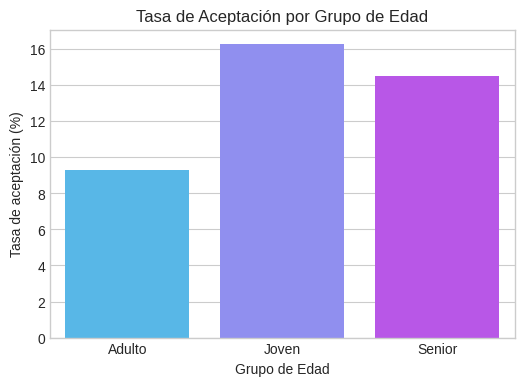

In [30]:
# Agrupamos por grupo de edad y calculamos tasa de aceptación
tasa_edad = df.groupby('grupo_edad')['y'].value_counts(normalize=True).unstack().fillna(0)
tasa_edad['tasa_si'] = tasa_edad['yes'] * 100

plt.figure(figsize=(6,4))
sns.barplot(x=tasa_edad.index, y=tasa_edad['tasa_si'], palette='cool')
plt.title('Tasa de Aceptación por Grupo de Edad')
plt.ylabel('Tasa de aceptación (%)')
plt.xlabel('Grupo de Edad')
plt.show()

Los clientes del grupo "Joven" (menores de 30 años) presentan la mayor tasa de aceptación, seguidos por los “Senior”.
Los adultos tienen una tasa mucho menor, lo que sugiere que la edad influye en la predisposición a adquirir productos de ahorro o inversión.
Esto podría deberse a que las personas jovenes en estos últimos años han sido concientizadas acerca de concecptos relacionados como la estabilidad financiera y reantibilidad a largo plazo.

### ¿La frecuencia de contacto influye en la respuesta del cliente?

/tmp/ipython-input-3111963272.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_contacto.index, y=tasa_contacto['tasa_si'], palette='viridis')


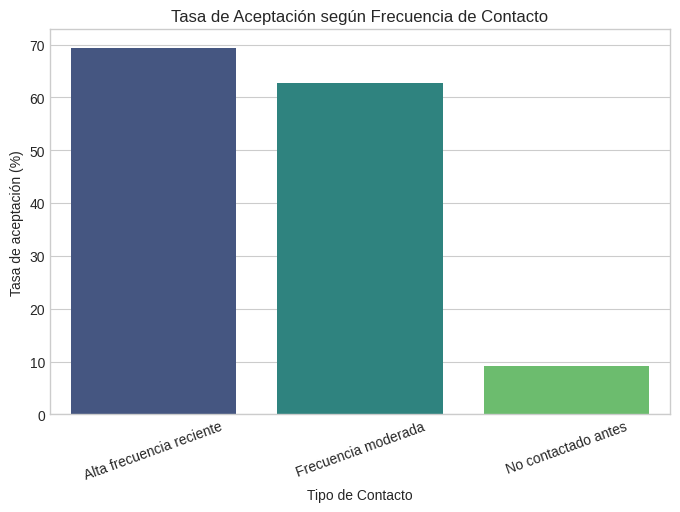

In [32]:
# Análisis de tasa de aceptación por categoría de contacto reciente
tasa_contacto = df.groupby('contactos_recientes')['y'].value_counts(normalize=True).unstack().fillna(0)
tasa_contacto['tasa_si'] = tasa_contacto['yes'] * 100

plt.figure(figsize=(8,5))
sns.barplot(x=tasa_contacto.index, y=tasa_contacto['tasa_si'], palette='viridis')
plt.title('Tasa de Aceptación según Frecuencia de Contacto')
plt.ylabel('Tasa de aceptación (%)')
plt.xlabel('Tipo de Contacto')
plt.xticks(rotation=20)
plt.show()

Los clientes con contactos recientes o frecuentes muestran una tasa de aceptación más alta que aquellos que no habían sido contactados anteriormente.
Esto indica que mantener una comunicación constante mejora la efectividad de las campañas, probablemente por una mayor familiaridad o confianza con el banco.
Sin embargo, los contactos excesivos pueden generar fatiga, por lo que es importante optimizar la frecuencia de llamadas.